Datasets D1.csv and D2.csv are relevant to this question.

a.
Perform EDA on these datasets and generate the relevant plots. Explain why you have chosen these plots and report your initial observations. [2 marks]

b.
For each dataset, perform regression analysis and report the following metrics: [2 marks]
i.
Coefficients (slope and intercept)
ii.
MSE
iii.
R^2 score
iv.
Plot of data points along with the regression line.

c.
Compare the slope, intercept and R² values related to D1 and D2. What do you observe? Explain why this is possible. What does this tell you about the quality of fit and data variability? [2 marks]

d.
Suppose dataset D2 had a very low R² score. Can we say that the regression model is incorrect or poorly fitted? Justify your answer. [2 marks]

e.
What changes can you possibly make to D2 to obtain better models? Would transforming the data help? [2]


In [2]:
# prompt: read D1.csv and D2.csv from runtime

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the datasets
try:
  d1 = pd.read_csv('D1.csv')
  d2 = pd.read_csv('D2.csv')
except FileNotFoundError:
  print("Error: 'D1.csv' or 'D2.csv' not found. Please upload the files.")
  exit()

In [25]:
# Performing EDA on these datasets:
d1.info()
d2.info()

desc_stats_d1 = d1.describe(percentiles=[0.25, 0.5, 0.75]).T
desc_stats_d1['median'] = d1.median()
desc_stats_d1['skewness'] = d1.skew()
desc_stats_d1['kurtosis'] = d1.kurtosis()
desc_stats_d2 = d2.describe(percentiles=[0.25, 0.5, 0.75]).T
desc_stats_d2['skewness'] = d2.skew()
desc_stats_d2['kurtosis'] = d2.kurtosis()


print("Descriptive Statistics for D1:")
print(desc_stats_d1)

print("\nDescriptive Statistics for D2:")
print(desc_stats_d2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB
Descriptive Statistics for D1:
    count       mean       std       min      25%        50%        75%  \
x  1000.0   5.000000  2.891085  0.000000  2.50000   5.000000   7.500000   
y  1000.0  14.954743  5.860585  2.847411  9.82627  14.793984  20.061104   

         max     median      skewness  kurtosis  
x  10.000000   5.000000  1.057011e-15 -1.200000  
y  26.638234  14.793984  4.002331e-02 -1.128713  

Desc

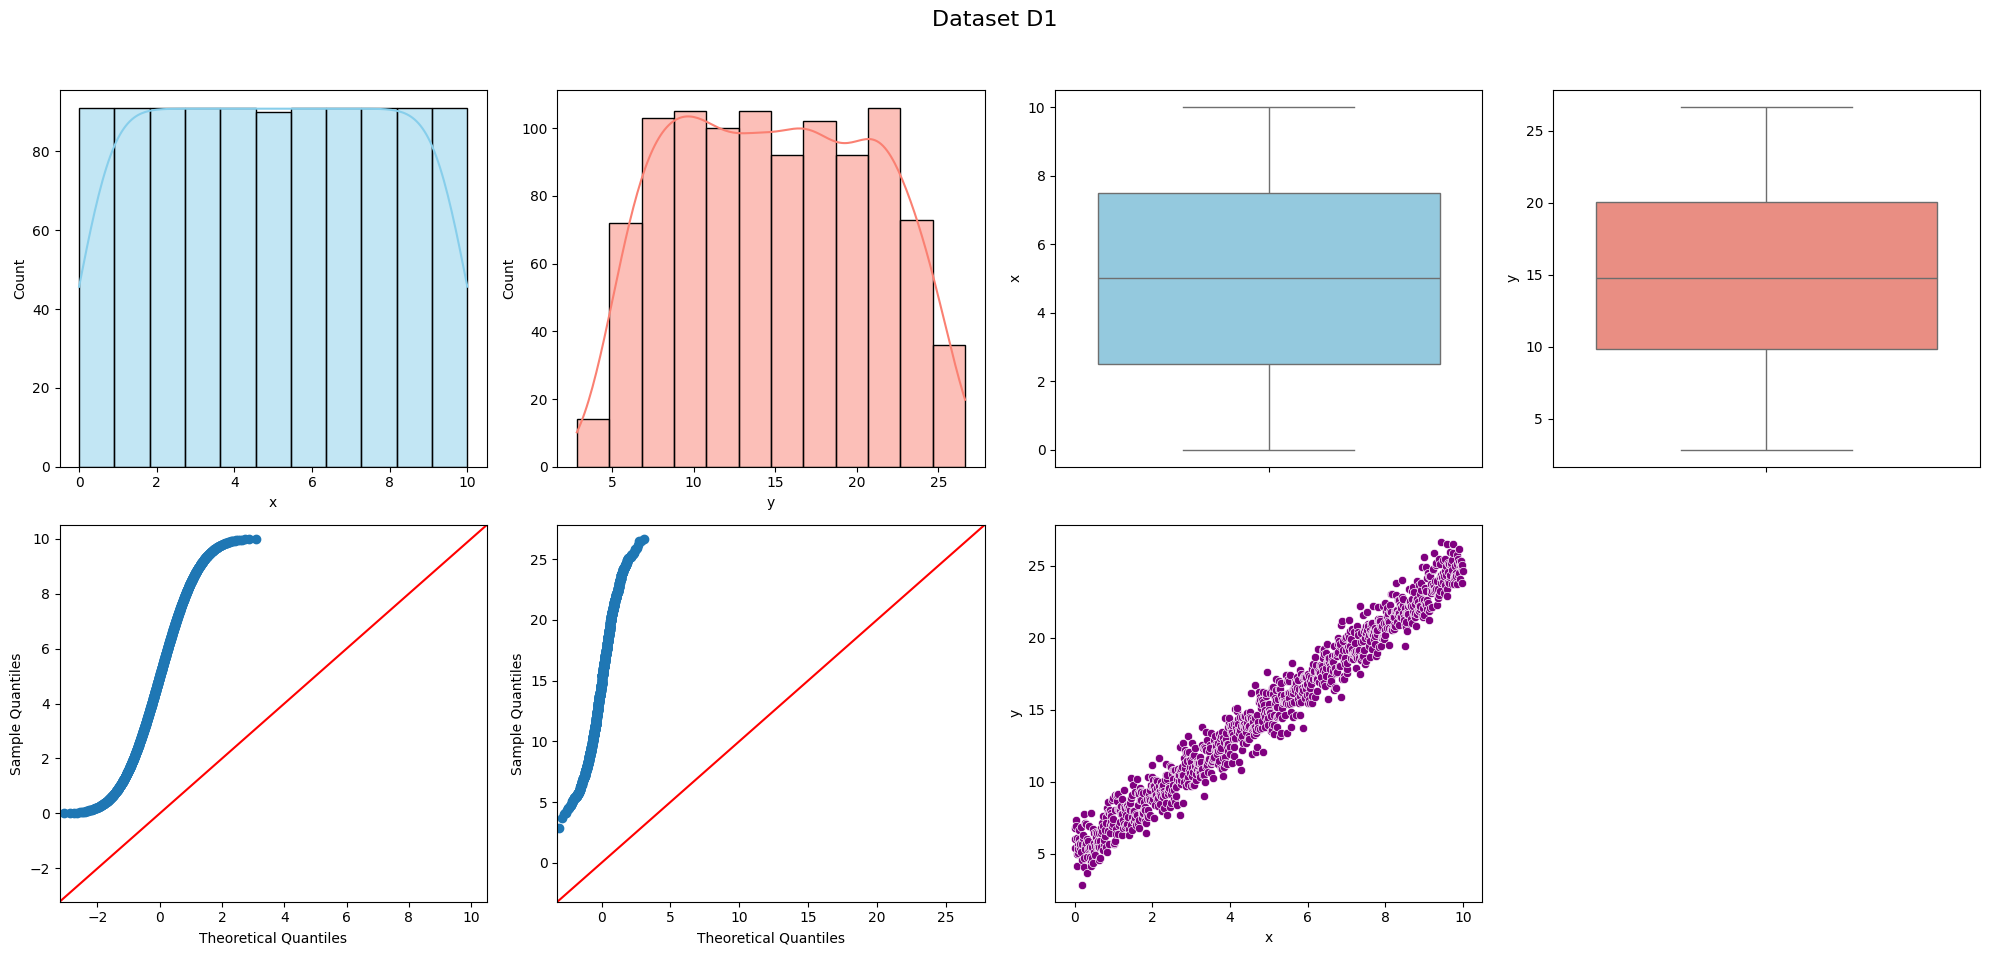

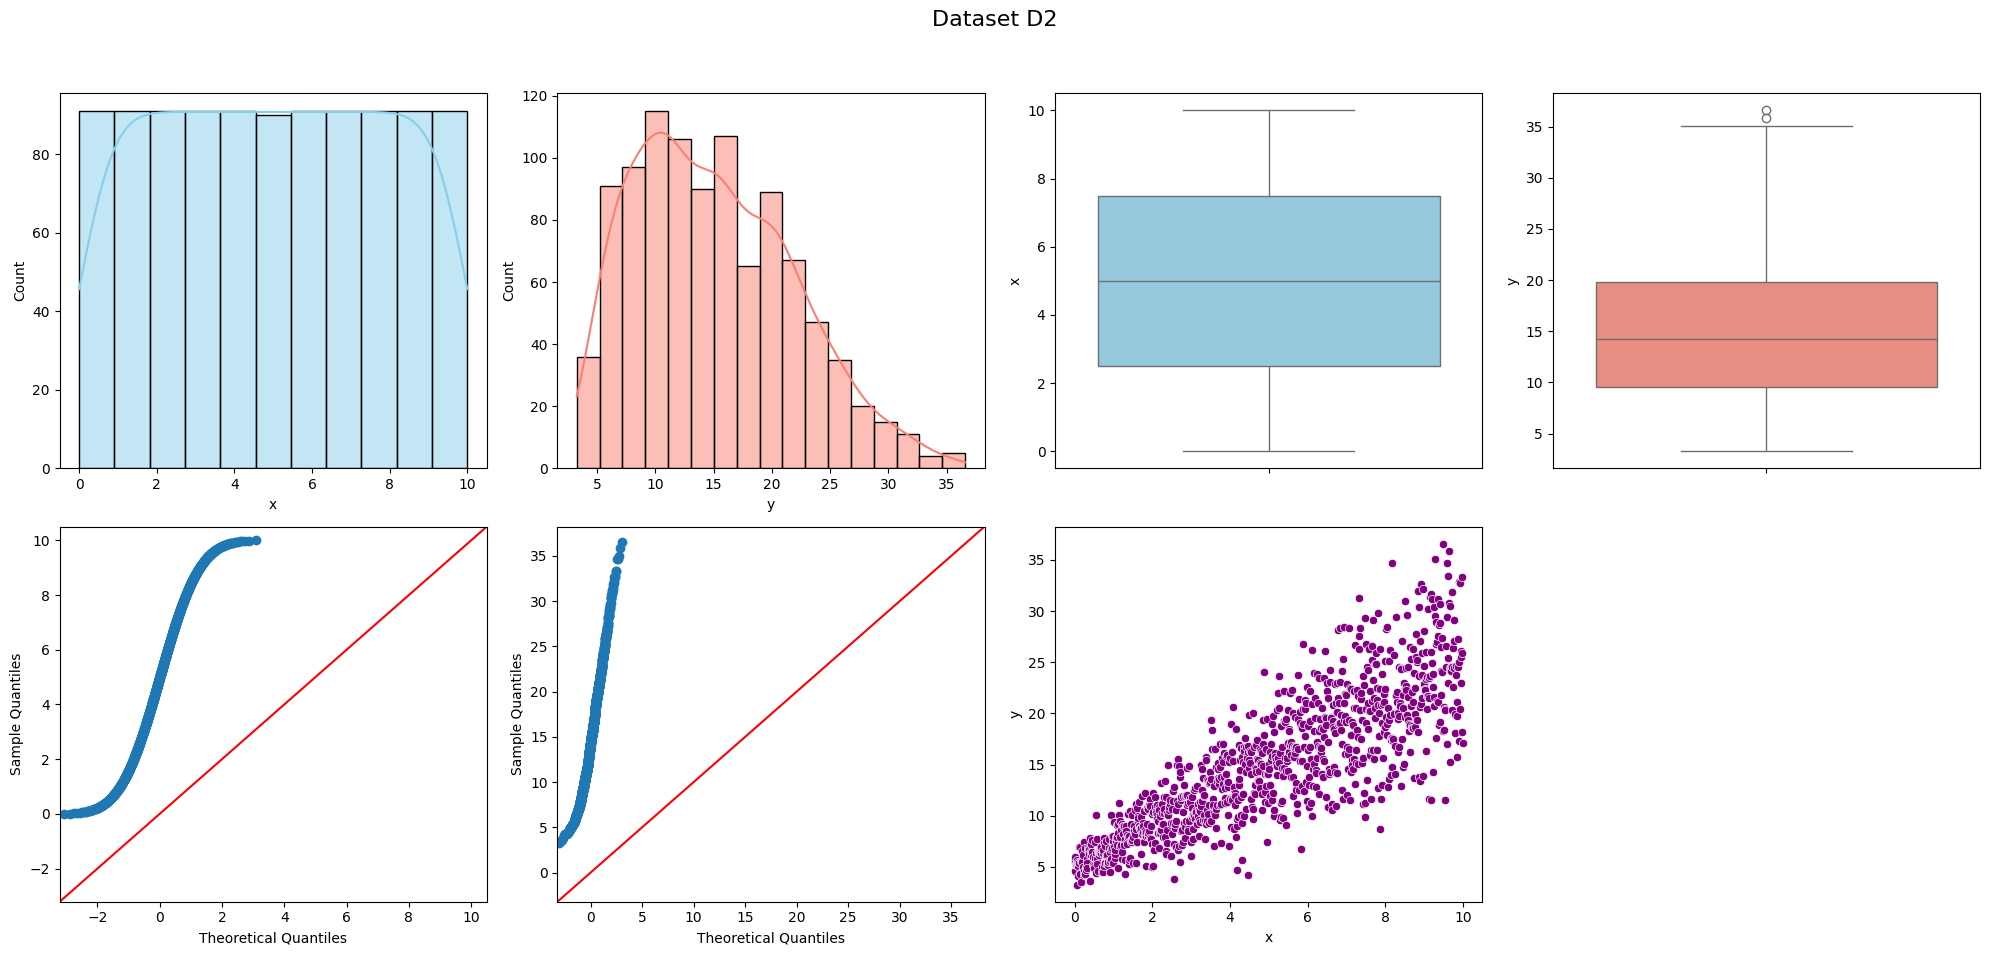

In [31]:
# prompt: plot separately for x and y for both datasets: histogram with KDE's, boxplot, Q-Q and scatter plots for both the datasets in different plots horizontally with different colours.

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

# Assuming 'd1' and 'd2' DataFrames are already loaded as in the previous code.

def plot_data(data, title):
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    fig.suptitle(title, fontsize=16)

    # Histogram with KDE
    sns.histplot(data['x'], kde=True, color='skyblue', ax=axes[0, 0])
    sns.histplot(data['y'], kde=True, color='salmon', ax=axes[0, 1])

    # Boxplot
    sns.boxplot(data['x'], color='skyblue', ax=axes[0, 2])
    sns.boxplot(data['y'], color='salmon', ax=axes[0, 3])

    # Q-Q plot
    sm.qqplot(data['x'], line='45', ax=axes[1, 0])
    sm.qqplot(data['y'], line='45', ax=axes[1, 1])

    # Scatter plot
    sns.scatterplot(x='x', y='y', data=data, color='purple', ax=axes[1, 2])

    #Empty plot to keep layout
    axes[1,3].axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to accommodate title
    plt.show()

plot_data(d1, 'Dataset D1')
plot_data(d2, 'Dataset D2')


>>
- D1 and D2 both contain two columns x and y with Dtype float  
- There are no null values in D1 or D2 datasets. these datasets contain two vectors with length of 1000 each.
- skewness: Near 0 skewness for x for both the datasets: near perfect symmetry. Y has slightly positive skewness in D2.
- Kurtosis: both the datasets has negative kurtosis value: dataset has light tail.
- Looking at the plot of D1 and D2, we can see that y values in D1 are evenly distributed as the value of x increases. However, for D2, the spread of y is increasing as the value of x is increasing. This imlies that data has Heteroscedasticity: variance of y is not constant in D2.
- Looking at the boxplot, some outliers are present in y for D2, rest of the data does not contain any outlier.


In [ ]:
# b: For each dataset, perform regression analysis and report the following met

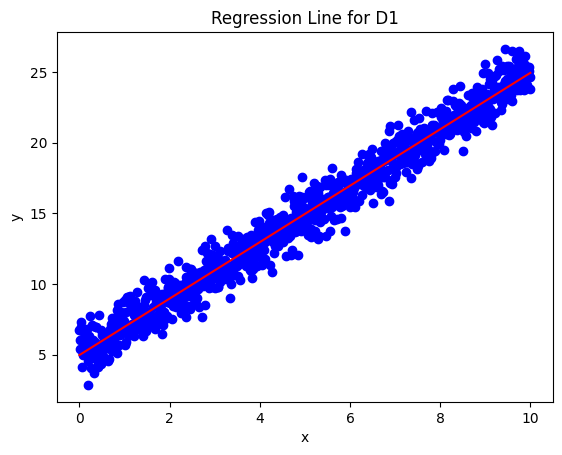

Regression Metrics for D1:
Coefficients: {'slope': np.float64(1.9981378354156742), 'intercept': np.float64(4.964054115431438)}
MSE: 0.9742055013188605
R^2: 0.9716075272007758


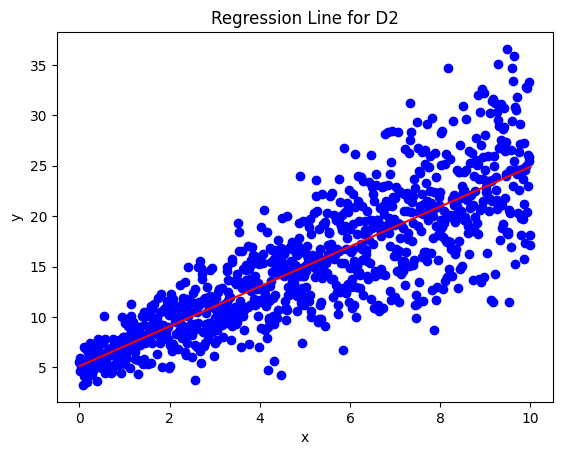

Regression Metrics for D2:
Coefficients: {'slope': np.float64(1.9774547886146296), 'intercept': np.float64(5.120464818401329)}
MSE: 13.443572282865233
R^2: 0.7083499356684422


In [28]:
# prompt: For each dataset, perform regression analysis and report the following metrics: Coefficients(slope and intercept), mse, r^2

# Assuming 'd1' and 'd2' DataFrames are already loaded as in the provided code.

def perform_regression(df, dataset_name):
    X = df[['x']]
    y = df['y']
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    coefficients = {
        'slope': model.coef_[0],
        'intercept': model.intercept_
    }
    mse = mean_squared_error(y, y_pred)
    r2 = r2_score(y, y_pred)

    plt.figure()
    plt.scatter(X, y, color='blue')
    plt.plot(X, y_pred, color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Regression Line for {dataset_name}')
    plt.show()

    print(f"Regression Metrics for {dataset_name}:")
    print("Coefficients:", coefficients)
    print("MSE:", mse)
    print("R^2:", r2)

    return coefficients, mse, r2

# Perform regression for D1
coefficients_d1, mse_d1, r2_d1 = perform_regression(d1, 'D1')

# Perform regression for D2
coefficients_d2, mse_d2, r2_d2 = perform_regression(d2, 'D2')


>>D1: Coefficients: {'slope': np.float64(1.9981378354156742), 'intercept': np.float64(4.964054115431438)}

>> d2: Coefficients: {'slope': np.float64(1.9774547886146296), 'intercept': np.float64(5.120464818401329)}

C.) Compare the slope, intercept and R² values related to D1 and D2. What do you observe? Explain why this is possible. What does this tell you about the quality of fit and data variability?

Ans:
Looking at the slope and intercept of the regressions lines of D1 and D2, they are very close to each other.

however, as expected, MSE for D1 is way less than MSE for D2(~13.4), that is because the variance of the data in D2 is increasing as the value of x increases. This also affects the R^2 metric which drops significantly from D1 to D2.

Therefore we can conclude that the regression line for D1 is more reliably fit as compared to D2. (97% as compared to ~71%)

D.) Suppose dataset D2 had a very low R² score. Can we say that the regression model is incorrect or poorly fitted? Justify your answer.

Ans: D2 has a R^2 value of ~ 71%, which is considered just okay as per standards, however, if we suppose that D2 has a very low R^2 value, we CAN say that data is poorly fitted by the model(it may still represent the data but the predictions will be less reliable if we use the model).

e:) What changes can you possibly make to D2 to obtain better models? Would transforming the data help?

Ans: Looking at the scatter plot of the data, we concluded that model is affected by hetroscedasticity: which can be taken care off by changing the scale of y or x variable: by calculating how the variance is affected when x increases, we can select the scale for y. (eg. if var(y) is increasing exponentially, we use Logarithmic scale on y(or use np.exp(x) for x),
if it increases as a function of x^2, i.e, the relationship is non linear, then we take a square root of y/ or use x^2 instead of x for calculation of regression line)

While we are changing the scale of y, it is also important to remove outliers on the basis of IQ range